#### Regressão Linear Simples: Previsão de Limite de Crédito

Neste case, você deverá aplicar a regressão linear simples para estimar o limite de crédito de clientes de um banco, a partir do score deles no Serasa. O seu dataset contém duas colunas: Score e Limit. Aplique a regressão linear, utilizando o LinearRegression do sklearn e, também, o OLS do statsmodels.

Observe as características do erro, bem como calcule as métricas vistas durante a aula.

### Importação das bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import statsmodels.api as sm

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

sns.set()
pio.templates.default = 'plotly_dark'

### Importar e avaliar o Dataframe

In [2]:
#DataFrame
df = pd.read_csv('credito.csv')
df.head(3)

,Limit,Score
0,3606,283
1,6645,483
2,7075,514


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Limit   400 non-null    int64
 1   Score   400 non-null    int64
dtypes: int64(2)
memory usage: 6.4 KB


In [4]:
df.describe()

,Limit,Score
count,400.000000,400.000000
mean,4735.600000,354.940000
std,2308.198848,154.724143
min,855.000000,93.000000
25%,3088.000000,247.250000
50%,4622.500000,344.000000
75%,5872.750000,437.250000
max,13913.000000,982.000000


### Visualização gráfica

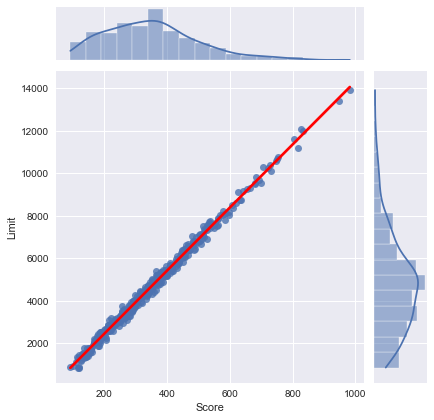

In [5]:
#Analisar a relação de forma visual
px.scatter(df, x='Score', y='Limit', width=800, height=600, marginal_x='histogram', marginal_y='histogram')
plt.style.use('seaborn')
sns.jointplot(data=df, x='Score', y='Limit', kind='reg', joint_kws={'line_kws':{'color':'red'}})

### Calculando a correlação entre Limit e Score

In [6]:
correlacao, p_value = pearsonr(df['Limit'], df['Score'])

#𝐻0 : Os nossos dados não possuem uma correlação forte
#𝐻1 : Os nossos dados possuem uma correlação forte

if p_value <= 0.05:
  print('Rejeita a hipótese H0, ou seja, os nossos dados possuem uma correlação alta')
else:
  print('Aceita H0, ou seja, os nossos dados NÃO possuem uma correlação alta')

#A correlação é muito elevada, acima de 0.99
print(f'O valor da correlação é {correlacao}')

Rejeita a hipótese H0, ou seja, os nossos dados possuem uma correlação alta
O valor da correlação é 0.9968797370016825


In [7]:
df.corr()

,Limit,Score
Limit,1.00000,0.99688
Score,0.99688,1.00000


### Regressão com Scikit Learn

In [8]:
X = df['Score']
y = df['Limit']
lr = LinearRegression()

In [9]:
#Treinar o modelo
lr.fit(X.values.reshape(-1, 1), y.values)

print(f'Valor beta1: {lr.coef_}')
print(f'Valor beta0: {lr.intercept_}')

Valor beta1: [14.87160712]
Valor beta0: -542.9282299869001


Ou seja a função é | F(x) = 14.87*x -542.92 |

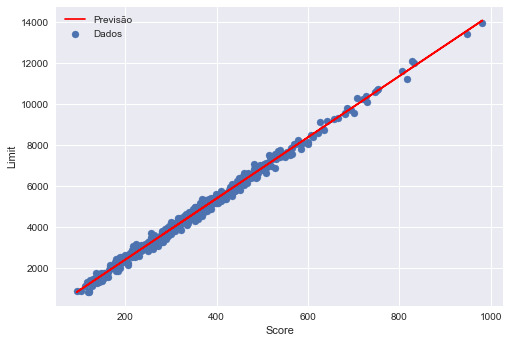

In [10]:
plt.scatter(df['Score'], df['Limit'])
plt.plot(X,lr.predict(X.values.reshape(-1, 1)),'red')

plt.ylabel('Limit')
plt.xlabel('Score')

plt.legend(['Previsão', 'Dados'])

### Regressão com Statsmodel OS

In [11]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

C:\Users\Gartarok\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 6.348e+04
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:18:56   Log-Likelihood:                -2649.1
No. Observations:                 400   AIC:                             5302.
Df Residuals:                     398   BIC:                             5310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -542.9282     22.850    -23.760      0.000    -587.851    -498.006
Score         14.8716      0.059    251.949      0.000      14.756      14.988
==============================================================================
Omnibus:                        6.887   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                4.980
Skew:                          -0.145   Prob(JB):                       0.0829
Kurtosis:                       2.537   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model.params

const   -542.928230
Score     14.871607
dtype: float64

Ou seja a função é | F(x) = 14.87*x -542.92 |

In [13]:
y_est = df['Score'] * model.params[1] + model.params[0]

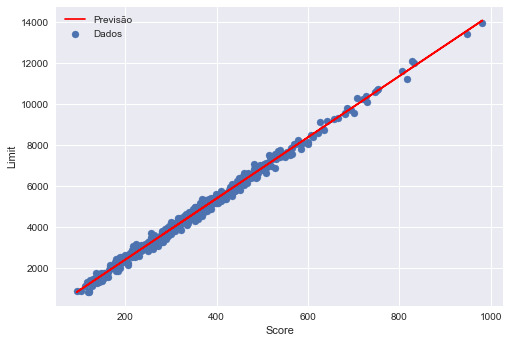

In [14]:
plt.scatter(df['Score'],df['Limit'])
plt.plot(df['Score'],y_est,c='red')

plt.ylabel('Limit')
plt.xlabel('Score')

plt.legend(['Previsão', 'Dados'])

### Residuos da regressão

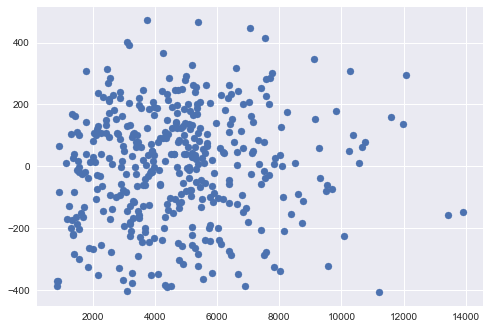

In [15]:
plt.scatter(df['Limit'], model.resid)

## *Métricas para Análise dos Erros*


### 1. R-Quadrado ($R^2$)

In [18]:
#Muito alto
from sklearn.metrics import r2_score
r2_score(y, y_est)

0.9937692100445441

### 2. MAE

In [19]:
from sklearn.metrics import mean_absolute_error as MAE
MAE(y, y_est)

148.11361681808242

### 3. MSE

In [20]:
from sklearn.metrics import mean_squared_error as MSE
MSE(y, y_est)

33113.29934556935

### 4. RMSE

In [21]:
np.sqrt(MSE(y, y_est))

181.97060022313866

### 5. RMSLE

In [22]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y, y_est))

0.06115825442028287

### Treino/Teste

In [23]:
from sklearn.model_selection import train_test_split
X = df['Score'].values
y = df['Limit'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lr = LinearRegression()
lr.fit(X_train.reshape(-1,1), y_train)

LinearRegression()

In [ ]:
#Coeficientes muito parecidos

In [24]:
lr.coef_

array([14.86270961])

In [25]:
lr.intercept_

-537.3499058490461

In [28]:
y_est = lr.predict(X_test.reshape(-1,1))

In [29]:
r2_score(y_test, y_est)

0.9908232912262109

In [30]:
#fim